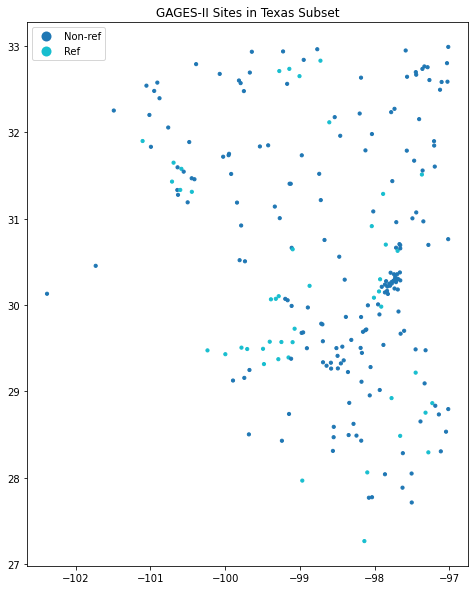

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import os

gages = gpd.read_file('/Projects/HydroMet/currierw/gagesII/gagesII_9322_sept30_2011.shp')
# Load Excel table with full attributes
# Load only the relevant sheet and columns
dams = pd.read_excel(
    "/Projects/HydroMet/currierw/gagesII/gagesII_sept30_2011_conterm.xlsx",
    sheet_name="HydroMod_Dams",
    usecols=["STAID", "NDAMS_2009"],
    dtype={"STAID": str}
)
# Merge the Excel data with the shapefile
gages = gages.merge(dams, on="STAID", how="left").to_crs(epsg=4326)

# Subset to Texas
gages_tx = gages[gages["STATE"] == "TX"]

minlon = -103
maxlon = -97
minlat  = 27
maxlat = 33

# Build texas subset
gages_tx = gages_tx.cx[minlon:maxlon, minlat:maxlat]

fig, ax = plt.subplots(figsize=(8, 10))
gages_tx.plot(ax=ax, column="CLASS", legend=True, markersize=10)
ax.set_title("GAGES-II Sites in Texas Subset")
plt.show()

In [27]:
gages_tx

,STAID,STANAME,CLASS,AGGECOREGI,DRAIN_SQKM,HUC02,LAT_GAGE,LNG_GAGE,STATE,HCDN_2009,ACTIVE09,FLYRS1900,FLYRS1950,FLYRS1990,geometry,NDAMS_2009
6068,08044800,"Walnut Ck at Reno, TX",Non-ref,WestPlains,162.6219,12,32.945680,-97.583080,TX,None,yes,14.0,14.0,14.0,POINT (-97.58308 32.94568),0.0
6069,08046000,"Clear Fk Trinity Rv nr Aledo, TX",Non-ref,WestPlains,650.0628,12,32.641244,-97.564468,TX,None,None,28.0,26.0,0.0,POINT (-97.56447 32.64124),46.0
6070,08047000,"Clear Fk Trinity Rv nr Benbrook, TX",Non-ref,WestPlains,1117.3240,12,32.665133,-97.441964,TX,None,yes,62.0,60.0,20.0,POINT (-97.44196 32.66513),49.0
6071,08047050,"Marys Ck at Benbrook, TX",Non-ref,WestPlains,139.8366,12,32.695132,-97.447242,TX,None,yes,11.0,11.0,11.0,POINT (-97.44724 32.69513),2.0
6072,08047500,"Clear Fk Trinity Rv at Ft Worth, TX",Non-ref,WestPlains,1341.5860,12,32.732353,-97.358906,TX,None,yes,85.0,60.0,20.0,POINT (-97.35891 32.73235),58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6439,08211800,"San Diego Ck at Alice, TX",Non-ref,WestPlains,819.9954,12,27.766693,-98.075558,TX,None,None,26.0,26.0,0.0,POINT (-98.07556 27.76669),11.0
6440,08211900,"San Fernando Ck at Alice, TX",Non-ref,WestPlains,1303.6940,12,27.772526,-98.033613,TX,None,yes,31.0,31.0,10.0,POINT (-98.03361 27.77253),20.0
6441,08212400,"LOS OLMOS CREEK NR FALFURRIAS, TX",Ref,WestPlains,1236.4680,12,27.264486,-98.135838,TX,None,yes,26.0,26.0,10.0,POINT (-98.13584 27.26449),1.0
6547,08376300,"Sanderson Ck at Sanderson, TX",Non-ref,WestXeric,567.6192,13,30.128520,-102.384865,TX,None,yes,16.0,16.0,4.0,POINT (-102.38487 30.12852),10.0


<AxesSubplot:>

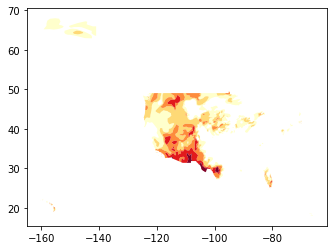

In [49]:

# Updated city list with coordinates
cities_data = {
    "city": [
        "Houston", "San Antonio", "Dallas", "Austin", "El Paso", "Corpus Christi", "Lubbock",
        "San Angelo", "Kerrville", "Lampasas"
    ],
    "lat": [
        29.7604, 29.4241, 32.7767, 30.2672, 31.7619, 27.8006, 33.5779,
        31.4638, 30.0474, 31.0635
    ],
    "lon": [
        -95.3698, -98.4936, -96.7970, -97.7431, -106.4850, -97.3964, -101.8552,
        -100.4370, -99.1400, -98.1830
    ]
}


# Create GeoDataFrame
cities_df = pd.DataFrame(cities_data)
cities_gdf = gpd.GeoDataFrame(
    cities_df,
    geometry=[Point(xy) for xy in zip(cities_df.lon, cities_df.lat)],
    crs="EPSG:4326"
)

# Optional: Load US counties (from public carto source)
counties = gpd.read_file("https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json").to_crs("EPSG:4326")
counties_tx = counties[counties["STATE"] == "48"].to_crs("EPSG:4326")


# Download from US Census TIGER/Line: States
states_url = "https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_us_state_500k.zip"
states = gpd.read_file(states_url)

# Filter for Texas (FIPS code 48 or name)
texas = states[states['NAME'] == 'Texas'].to_crs("EPSG:4326")

rivers_tx = gpd.read_file("medium_sized_rivers.gpkg", layer="rivers")


# Drought Monitor
gdf_dm=gpd.read_file('/Projects/HydroMet/currierw/drought_monitor/usdm_20250701.json')


In [28]:
# Load in all streamflow data

output_dir = "/Projects/HydroMet/currierw/USGS_Texas_gage_data/"
summary_df =pd.read_csv("longest_clean_record_summary.csv")

rank_records = []

for _, row in summary_df.iterrows():
    site_no = str(row['site_no'])
    series_name = row['longest_type'] # look for the parameter (daily mean/max discharge/gauge height) with the longest record and use that one
    n_years = row['n_years']

    try:
        # Load the pickled result
        result = pd.read_pickle(os.path.join(output_dir, f"0{site_no}.pkl"))
        annual_df = result['annual_daily'].get(series_name, None)
        if annual_df is None or 2025 not in annual_df.index:
            continue

        values = annual_df[series_name].dropna()
        val_2025 = values.get(2025, None)
        if pd.isna(val_2025):
            continue

        # Rank 2025 (1 = highest)
        rank = values.rank(ascending=False, method="min").get(2025)

        rank_records.append({
            "site_no": site_no,
            "series_name": series_name,
            "n_years": len(values),
            "value_2025": val_2025,
            "rank_2025": int(rank),
        })

    except Exception as e:
        print(f"⚠️ Skipping {site_no}: {e}")
        continue

rank_df = pd.DataFrame(rank_records)
# rank_df.to_csv("gage_2025_rankings.csv", index=False)
rank_df

,site_no,series_name,n_years,value_2025,rank_2025
0,8044800,gage_height_ft_max,31,3.17,31
1,8047000,discharge_cfs_mean,79,170.00,63
2,8047050,gage_height_ft_max,28,8.26,15
3,8047500,discharge_cfs_mean,102,697.00,93
4,8048000,discharge_cfs_mean,106,740.00,102
...,...,...,...,...,...
176,8211520,discharge_cfs_mean,54,9.40,54
177,8211800,discharge_cfs_mean,27,0.00,25
178,8211900,discharge_cfs_mean,50,2.06,50
179,8212400,discharge_cfs_mean,44,0.00,40


In [39]:
import geopandas as gpd

# Ensure both IDs are zero-padded strings
rank_df['site_no'] = rank_df['site_no'].astype(str).str.zfill(8)
gages_tx['STAID'] = gages_tx['STAID'].astype(str).str.zfill(8)

# Merge dataframes
merged = pd.merge(
    rank_df,
    gages_tx,
    left_on='site_no',
    right_on='STAID',
    how='inner'
)

# Convert to GeoDataFrame using geometry and CRS from gages_tx
gdf_ranked = gpd.GeoDataFrame(
    merged,
    geometry='geometry',
    crs=gages_tx.crs
)

# Sort by rank_2025
gdf_ranked = gdf_ranked.sort_values(by="rank_2025", ascending=False)

gdf_ranked

,site_no,series_name,n_years,value_2025,rank_2025,STAID,STANAME,CLASS,AGGECOREGI,DRAIN_SQKM,...,LAT_GAGE,LNG_GAGE,STATE,HCDN_2009,ACTIVE09,FLYRS1900,FLYRS1950,FLYRS1990,geometry,NDAMS_2009
49,08126380,discharge_cfs_mean,119,49.1,117,08126380,"Colorado Rv nr Ballinger, TX",Non-ref,WestPlains,42597.36000,...,31.715430,-100.026476,TX,None,yes,102.0,60.0,20.0,POINT (-100.02648 31.71543),88.0
171,08210000,discharge_cfs_mean,111,196.0,111,08210000,"Nueces Rv nr Three Rivers, TX",Non-ref,WestPlains,39967.60000,...,28.427495,-98.178063,TX,None,yes,94.0,60.0,20.0,POINT (-98.17806 28.42750),444.0
4,08048000,discharge_cfs_mean,106,740.0,102,08048000,"W Fk Trinity Rv at Ft Worth, TX",Non-ref,WestPlains,6741.19600,...,32.760963,-97.332517,TX,None,yes,89.0,60.0,20.0,POINT (-97.33252 32.76096),196.0
133,08183500,discharge_cfs_mean,101,526.0,101,08183500,"San Antonio Rv nr Falls City, TX",Non-ref,WestPlains,5464.45700,...,28.951641,-98.064172,TX,None,yes,84.0,60.0,20.0,POINT (-98.06417 28.95164),101.0
7,08049500,discharge_cfs_mean,101,1600.0,100,08049500,"W Fk Trinity Rv at Grand Prairie, TX",Non-ref,WestPlains,7908.25400,...,32.798741,-97.029730,TX,None,yes,84.0,60.0,20.0,POINT (-97.02973 32.79874),232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,08167000,discharge_cfs_mean,87,38400.0,3,08167000,"Guadalupe Rv at Comfort, TX",Non-ref,WestPlains,2174.37400,...,29.969659,-98.892811,TX,None,yes,70.0,60.0,20.0,POINT (-98.89281 29.96966),31.0
58,08134250,gage_height_ft_mean,26,15.1,2,08134250,"N Concho Rv nr Grape Creek, TX",Non-ref,WestPlains,3647.79400,...,31.542658,-100.555098,TX,None,yes,9.0,9.0,9.0,POINT (-100.55510 31.54266),3.0
82,08156910,discharge_cfs_max,19,1060.0,2,08156910,"Waller Ck at Koenig Lane, Austin, TX",Non-ref,WestPlains,2.81790,...,30.322778,-97.722778,TX,None,yes,2.0,2.0,2.0,POINT (-97.72278 30.32278),0.0
40,08104900,discharge_cfs_mean,59,24100.0,1,08104900,"S Fk San Gabriel Rv at Georgetown, TX",Ref,WestPlains,342.61740,...,30.625750,-97.691120,TX,yes,yes,41.0,41.0,20.0,POINT (-97.69112 30.62575),2.0


In [40]:
type(gdf_ranked)

geopandas.geodataframe.GeoDataFrame

/home/wcurrier/.conda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:116: UserWarning: Use the colorbar set_ticks() method instead.


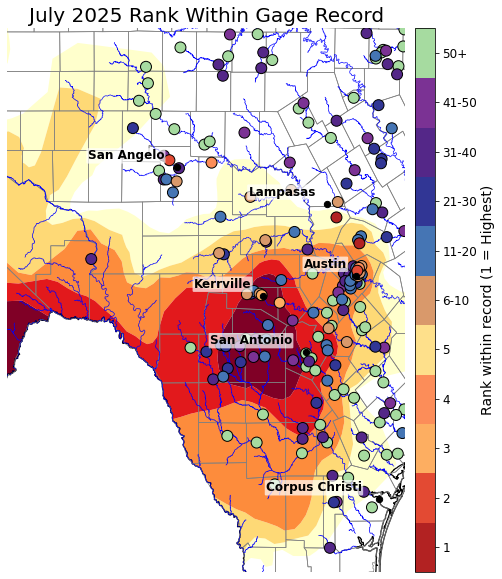

In [52]:

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colorbar import ColorbarBase
import pandas as pd
from matplotlib.cm import get_cmap


# --- User-defined zoom box ---
minx, maxx = -103, -97
miny, maxy = 27.0, 33



# --- Filter cities inside zoom box ---
cities_in_box = cities_gdf.cx[minx:maxx, miny:maxy]

# --- Prepare discrete bins & labels for rank_2025 ---
rank_bins = [0, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, np.inf]
rank_labels = ['1', '2', '3', '4', '5', '6-10', '11-20', '21-30', '31-40', '41-50', '50+']
gdf_ranked['rank_bins'] = pd.cut(
    gdf_ranked['rank_2025'], bins=rank_bins, labels=rank_labels, right=True, include_lowest=True)
gdf_ranked['rank_code'] = gdf_ranked['rank_bins'].cat.codes

# --- Define colormaps and norms ---
rank_colors = [
    '#b22222',  # 1 - Firebrick (deep red, more distinct)
    '#e34a33',  # 2 - Strong orange-red
    '#fdae61',  # 3 - Darker orange
    '#fc8d59',  # 4 - Orange
    '#fee08b',  # 5 - Yellow
    '#d9996b',  # 6-10 - Muted warm brown/terra cotta (less distinctive than pink)

    '#4575b4',  # 11-20 - Blue
    '#313695',  # 21-30 - Dark blue
    '#542788',  # 31-40 - Purple
    '#7b3294',  # 41-50 - Lighter purple
    '#a6dba0'   # 50+ - Muted greenish for distinct cool color
]

rank_cmap = ListedColormap(rank_colors)
rank_norm = BoundaryNorm(np.arange(-0.5, len(rank_labels)+0.5, 1), rank_cmap.N)


gdf_ranked['rank_code'] = gdf_ranked['rank_code'].astype(int)

# --- Create figure and axes ---
fig, ax = plt.subplots(figsize=(14, 10))  # Adjust size as needed

# --- Plot 1: Rank 2025 ---
gdf_ranked.plot(
    column='rank_code',
    cmap=rank_cmap,
    norm=rank_norm,
    legend=False,
    ax=ax,
    edgecolor='k',
    markersize=120,
    zorder=4
)
texas.boundary.plot(ax=ax, color='black', linewidth=1.2, zorder=1)
counties_tx.boundary.plot(ax=ax, color='gray', linewidth=0.7, zorder=2)
rivers_tx.plot(ax=ax, color='blue', linewidth=0.7, zorder=3)
cities_in_box.plot(ax=ax, color='black', markersize=40, label='Major Cities', zorder=5)
gdf_dm.plot(ax=ax,column='DM',cmap='YlOrRd',zorder=0,label='Drought Monitor')

ax.set_title("July 2025 Rank Within Gage Record", fontsize=20)
ax.axis('off')
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)


# --- Add city labels to the left with dynamic offset ---
for _, row in cities_in_box.iterrows():
    name_length = len(row.city)
    x_offset = -3 - (name_length * 1)

    offset = offset_copy(ax.transData, fig=fig, x=x_offset, y=5, units='points')

    ax.text(
        row.geometry.x,
        row.geometry.y,
        row.city,
        fontsize=12,
        fontweight='bold',
        color='black',
        transform=offset,
        ha='right',
        va='bottom',
        bbox=dict(boxstyle="round,pad=0.1", fc="white", ec="none", alpha=0.7),
        clip_on=True,
        zorder=10
    )
# --- Add colorbars aligned with plots ---

# Get axes positions
pos = ax.get_position()
cbar_ax_rank = fig.add_axes([
    pos.x1 + 0.01,
    pos.y0,
    0.02,
    pos.height
])
ColorbarBase(
    cbar_ax_rank,
    cmap=rank_cmap,
    norm=rank_norm,
    boundaries=np.arange(-0.5, len(rank_labels)+0.5, 1),
    ticks=np.arange(len(rank_labels)),
    spacing='uniform',
    orientation='vertical',
    ticklocation='auto'
)
cbar_ax_rank.set_yticks(np.arange(len(rank_labels)))
cbar_ax_rank.set_yticklabels(rank_labels)
cbar_ax_rank.set_ylabel('Rank within record (1 = Highest)', fontsize=14)
cbar_ax_rank.tick_params(labelsize=12)


fig.patch.set_facecolor('white')

# --- Adjust layout ---
# plt.subplots_adjust(left=0.03, right=0.92, top=0.93, bottom=0.05, wspace=0.15)


In [92]:
# List of counties to highlight
highlight_names = [
    "Bandera", "Bexar", "Burnet", "Caldwell", "Coke", "Comal", "Concho", "Gillespie", 
    "Guadalupe", "Kerr", "Kendall", "Kimble", "Llano", "Mason", "McCulloch", "Menard", 
    "San Saba", "Tom Green", "Travis", "Williamson"
]

# Create GeoDataFrame for highlighted counties
highlight_counties = counties_tx[counties_tx['NAME'].isin(highlight_names)]
highlight_counties

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
532,48411,0500000US48411,48,411,San Saba,County,1135.297,"POLYGON ((-98.43969 31.02954, -98.44578 30.921..."
541,48491,0500000US48491,48,491,Williamson,County,1118.303,"POLYGON ((-97.36954 30.41956, -97.57617 30.501..."
552,48053,0500000US48053,48,053,Burnet,County,994.258,"POLYGON ((-97.91168 31.03492, -97.84037 30.929..."
556,48095,0500000US48095,48,095,Concho,County,983.799,"POLYGON ((-100.11123 31.58027, -99.72170 31.57..."
577,48265,0500000US48265,48,265,Kerr,County,1103.318,"POLYGON ((-99.75762 30.07413, -99.75414 30.290..."
583,48319,0500000US48319,48,319,Mason,County,928.803,"POLYGON ((-98.96461 30.92137, -98.96411 30.500..."
1148,48055,0500000US48055,48,055,Caldwell,County,545.257,"POLYGON ((-97.31582 29.78654, -97.31789 29.784..."
1154,48081,0500000US48081,48,081,Coke,County,911.470,"POLYGON ((-100.23576 31.69297, -100.82537 31.6..."
1157,48091,0500000US48091,48,091,Comal,County,559.476,"POLYGON ((-98.44385 29.71965, -98.55049 29.760..."
1378,48451,0500000US48451,48,451,Tom Green,County,1521.972,"POLYGON ((-100.68876 31.08658, -100.69307 31.5..."


/home/wcurrier/.conda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:174: UserWarning: Use the colorbar set_ticks() method instead.


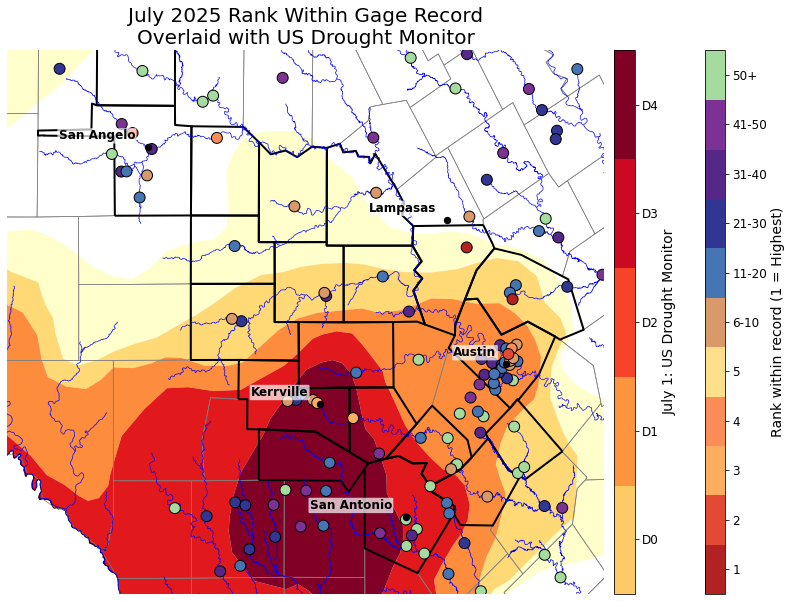

In [93]:

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colorbar import ColorbarBase
import pandas as pd
from matplotlib.cm import get_cmap


# --- User-defined zoom box ---
minx, maxx = -101.5, -97
miny, maxy = 29.0, 32



# --- Filter cities inside zoom box ---
cities_in_box = cities_gdf.cx[minx:maxx, miny:maxy]

# --- Prepare discrete bins & labels for rank_2025 ---
rank_bins = [0, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, np.inf]
rank_labels = ['1', '2', '3', '4', '5', '6-10', '11-20', '21-30', '31-40', '41-50', '50+']
gdf_ranked['rank_bins'] = pd.cut(
    gdf_ranked['rank_2025'], bins=rank_bins, labels=rank_labels, right=True, include_lowest=True)
gdf_ranked['rank_code'] = gdf_ranked['rank_bins'].cat.codes

# --- Define colormaps and norms ---
rank_colors = [
    '#b22222',  # 1 - Firebrick (deep red, more distinct)
    '#e34a33',  # 2 - Strong orange-red
    '#fdae61',  # 3 - Darker orange
    '#fc8d59',  # 4 - Orange
    '#fee08b',  # 5 - Yellow
    '#d9996b',  # 6-10 - Muted warm brown/terra cotta (less distinctive than pink)

    '#4575b4',  # 11-20 - Blue
    '#313695',  # 21-30 - Dark blue
    '#542788',  # 31-40 - Purple
    '#7b3294',  # 41-50 - Lighter purple
    '#a6dba0'   # 50+ - Muted greenish for distinct cool color
]

rank_cmap = ListedColormap(rank_colors)
rank_norm = BoundaryNorm(np.arange(-0.5, len(rank_labels)+0.5, 1), rank_cmap.N)


gdf_ranked['rank_code'] = gdf_ranked['rank_code'].astype(int)

# --- Create figure and axes ---
fig, ax = plt.subplots(figsize=(14, 10))  # Adjust size as needed

# --- Plot 1: Rank 2025 ---
gdf_ranked.plot(
    column='rank_code',
    cmap=rank_cmap,
    norm=rank_norm,
    legend=False,
    ax=ax,
    edgecolor='k',
    markersize=120,
    zorder=5
)
texas.boundary.plot(ax=ax, color='black', linewidth=1.2, zorder=1)
counties_tx.boundary.plot(ax=ax, color='gray', linewidth=0.7, zorder=2)
highlight_counties.boundary.plot(ax=ax, color='black', linewidth=2, zorder=3)
rivers_tx.plot(ax=ax, color='blue', linewidth=0.7, zorder=4)
cities_in_box.plot(ax=ax, color='black', markersize=40, label='Major Cities', zorder=6)
gdf_dm.plot(ax=ax,column='DM',cmap='YlOrRd',zorder=0,label='Drought Monitor')

ax.set_title("July 2025 Rank Within Gage Record\nOverlaid with US Drought Monitor", fontsize=20)
ax.axis('off')
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)


# --- Add city labels to the left with dynamic offset ---
for _, row in cities_in_box.iterrows():
    name_length = len(row.city)
    x_offset = -3 - (name_length * 1)

    offset = offset_copy(ax.transData, fig=fig, x=x_offset, y=5, units='points')

    ax.text(
        row.geometry.x,
        row.geometry.y,
        row.city,
        fontsize=12,
        fontweight='bold',
        color='black',
        transform=offset,
        ha='right',
        va='bottom',
        bbox=dict(boxstyle="round,pad=0.1", fc="white", ec="none", alpha=0.7),
        clip_on=True,
        zorder=10
    )
# --- Add colorbars aligned with plots ---

# # Get axes positions
# pos = ax.get_position()
# cbar_ax_rank = fig.add_axes([
#     pos.x1 + 0.01,
#     pos.y0,
#     0.02,
#     pos.height
# ])
# ColorbarBase(
#     cbar_ax_rank,
#     cmap=rank_cmap,
#     norm=rank_norm,
#     boundaries=np.arange(-0.5, len(rank_labels)+0.5, 1),
#     ticks=np.arange(len(rank_labels)),
#     spacing='uniform',
#     orientation='vertical',
#     ticklocation='auto'
# )
# cbar_ax_rank.set_yticks(np.arange(len(rank_labels)))
# cbar_ax_rank.set_yticklabels(rank_labels)
# cbar_ax_rank.set_ylabel('Rank within record (1 = Highest)', fontsize=14)
# cbar_ax_rank.tick_params(labelsize=12)

# --- Define DM color bins and labels ---
dm_labels = ['D0', 'D1', 'D2', 'D3', 'D4']
# Use matplotlib's YlOrRd colormap, pick 5 colors evenly spaced to match the 5 categories
cmap_base = plt.get_cmap('YlOrRd')
dm_colors = cmap_base(np.linspace(0.3, 1.0, len(dm_labels)))  # avoid very light yellow for D0

# Create ListedColormap and norm
dm_cmap = ListedColormap(dm_colors)
dm_bounds = np.arange(-0.5, len(dm_labels))  # length = nlabels + 1
dm_norm = BoundaryNorm(dm_bounds, dm_cmap.N)

# --- Get main axes position for colorbar positioning ---
pos = ax.get_position()

# --- Colorbar for DM ---
cbar_ax_dm = fig.add_axes([
    pos.x1 + 0.01,  # just right of main plot
    pos.y0,
    0.02,
    pos.height
])
cbar_dm = ColorbarBase(
    cbar_ax_dm,
    cmap=dm_cmap,
    norm=dm_norm,
    boundaries=dm_bounds,
    ticks=np.arange(len(dm_labels)),
    spacing='uniform',
    orientation='vertical',
    ticklocation='auto'
)
cbar_dm.ax.set_yticklabels(dm_labels)
cbar_dm.ax.set_ylabel('July 1: US Drought Monitor', fontsize=14)
cbar_dm.ax.tick_params(labelsize=12)

# --- Colorbar for Rank (move it a bit more right) ---
cbar_ax_rank = fig.add_axes([
    pos.x1 + 0.1,  # shifted right to avoid overlap with DM cbar
    pos.y0,
    0.02,
    pos.height
])
ColorbarBase(
    cbar_ax_rank,
    cmap=rank_cmap,
    norm=rank_norm,
    boundaries=np.arange(-0.5, len(rank_labels)+0.5, 1),
    ticks=np.arange(len(rank_labels)),
    spacing='uniform',
    orientation='vertical',
    ticklocation='auto'
)
cbar_ax_rank.set_yticks(np.arange(len(rank_labels)))
cbar_ax_rank.set_yticklabels(rank_labels)
cbar_ax_rank.set_ylabel('Rank within record (1 = Highest)', fontsize=14)
cbar_ax_rank.tick_params(labelsize=12)





fig.patch.set_facecolor('white')

# --- Adjust layout ---
# plt.subplots_adjust(left=0.03, right=0.92, top=0.93, bottom=0.05, wspace=0.15)


/home/wcurrier/.conda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:149: UserWarning: Use the colorbar set_ticks() method instead.


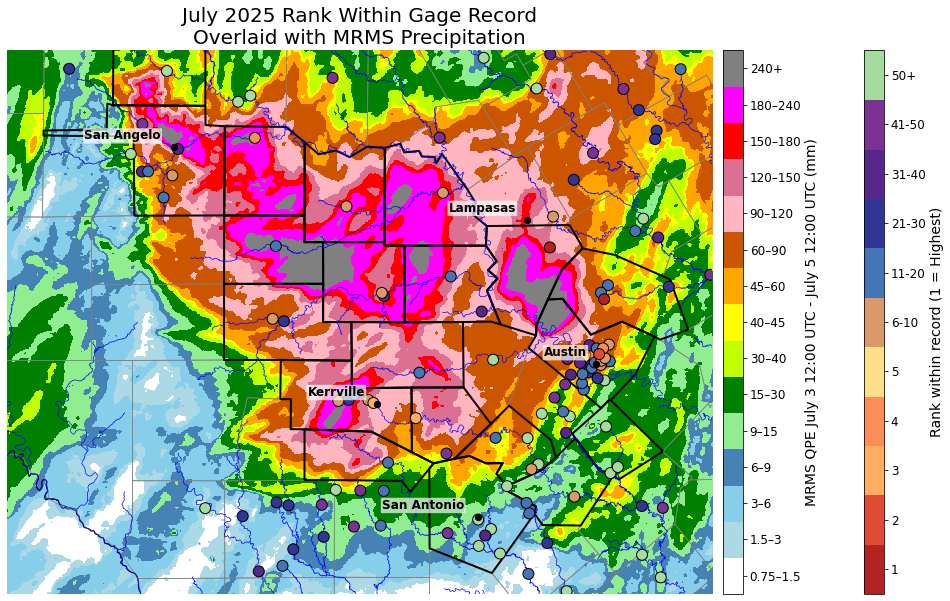

In [94]:
summedP=xr.open_dataset('/Projects/HydroMet/currierw/TexasMRMS_2025070312_2025070512.nc')
summedP = summedP.assign_coords(
    longitude=(((summedP.longitude + 180) % 360) - 180)
)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colorbar import ColorbarBase
from matplotlib.transforms import offset_copy
import numpy as np

# --- Define zoom box ---
minx, maxx = -101.5, -97
miny, maxy = 29.0, 32

# --- Filter cities inside zoom box ---
cities_in_box = cities_gdf.cx[minx:maxx, miny:maxy]

# --- Prepare bins & colormap for rank data ---
rank_bins = [0, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, np.inf]
rank_labels = ['1', '2', '3', '4', '5', '6-10', '11-20', '21-30', '31-40', '41-50', '50+']
gdf_ranked['rank_bins'] = pd.cut(gdf_ranked['rank_2025'], bins=rank_bins, labels=rank_labels, right=True, include_lowest=True)
gdf_ranked['rank_code'] = gdf_ranked['rank_bins'].cat.codes.astype(int)

rank_colors = [
    '#b22222', '#e34a33', '#fdae61', '#fc8d59', '#fee08b', '#d9996b',
    '#4575b4', '#313695', '#542788', '#7b3294', '#a6dba0'
]
rank_cmap = ListedColormap(rank_colors)
rank_norm = BoundaryNorm(np.arange(-0.5, len(rank_labels)+0.5, 1), rank_cmap.N)

# --- Prepare colormap for precipitation data ---
precip_bounds = [0.75, 1.5, 3, 6, 9, 15, 30, 40, 45, 60, 90, 120, 150, 180, 240, 9999]
precip_labels = [
    '0.75–1.5', '1.5–3', '3–6', '6–9', '9–15', '15–30', '30–40',
    '40–45', '45–60', '60–90', '90–120', '120–150', '150–180', '180–240', '240+'
]
precip_colors = [
    'white', '#add8e6', '#87ceeb', '#4682b4', '#90ee90', '#008000',
    '#bfff00', 'yellow', 'orange', '#cc5500', '#ffb6c1', '#db7093',
    'red', 'magenta', 'gray'
]
precip_cmap = ListedColormap(precip_colors)
precip_norm = BoundaryNorm(precip_bounds, len(precip_colors))

# --- Get lat/lon extent from summedP ---
lat = summedP['latitude'].values
lon = summedP['longitude'].values
min_lon, max_lon = lon.min(), lon.max()
min_lat, max_lat = lat.min(), lat.max()

# --- Start plot ---
fig, ax = plt.subplots(figsize=(14, 10))

# --- Plot precipitation as background ---
im = ax.imshow(
    summedP['paramId_0'].squeeze(),
    cmap=precip_cmap,
    norm=precip_norm,
    extent=[min_lon, max_lon, min_lat, max_lat],
    origin='upper',
    zorder=0
)

# --- Overlay shapefiles ---
texas.boundary.plot(ax=ax, color='black', linewidth=1.2, zorder=1)
counties_tx.boundary.plot(ax=ax, color='gray', linewidth=0.7, zorder=2)
highlight_counties.boundary.plot(ax=ax, color='black', linewidth=2, zorder=3)
rivers_tx.plot(ax=ax, color='blue', linewidth=0.7, zorder=4)
cities_in_box.plot(ax=ax, color='black', markersize=40, label='Major Cities', zorder=6)

gdf_ranked.plot(
    column='rank_code',
    cmap=rank_cmap,
    norm=rank_norm,
    ax=ax,
    edgecolor='k',
    markersize=120,
    zorder=5
)

# --- Add city labels ---
for _, row in cities_in_box.iterrows():
    name_length = len(row.city)
    x_offset = -3 - (name_length * 1)
    offset = offset_copy(ax.transData, fig=fig, x=x_offset, y=5, units='points')
    ax.text(
        row.geometry.x,
        row.geometry.y,
        row.city,
        fontsize=12,
        fontweight='bold',
        color='black',
        transform=offset,
        ha='right',
        va='bottom',
        bbox=dict(boxstyle="round,pad=0.1", fc="white", ec="none", alpha=0.7),
        clip_on=True,
        zorder=10
    )

# --- Set extent and styling ---
ax.set_title("July 2025 Rank Within Gage Record\nOverlaid with MRMS Precipitation", fontsize=20)
ax.axis('off')
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# --- Add colorbars ---
pos = ax.get_position()

# --- Colorbar 1: Precipitation ---
# Dummy mappable for equal spacing
dummy_data = np.arange(len(precip_colors)).reshape(1, -1)
dummy_norm = BoundaryNorm(np.arange(len(precip_colors) + 1), len(precip_colors))

cbar_ax_precip = fig.add_axes([
    pos.x1 + 0.01,  # to right of main plot
    pos.y0,
    0.02,
    pos.height
])
cbar_precip = fig.colorbar(
    plt.cm.ScalarMappable(cmap=ListedColormap(precip_colors), norm=dummy_norm),
    cax=cbar_ax_precip,
    ticks=np.arange(len(precip_labels)) + 0.5,
    spacing='uniform',
    orientation='vertical'
)
cbar_precip.ax.set_yticklabels(precip_labels)
cbar_precip.set_label('MRMS QPE July 3 12:00 UTC - July 5 12:00 UTC (mm)', fontsize=14)
cbar_precip.ax.tick_params(labelsize=12)

# --- Colorbar 2: Rank ---
cbar_ax_rank = fig.add_axes([
    pos.x1 + 0.15,  # space out to the right
    pos.y0,
    0.02,
    pos.height
])
ColorbarBase(
    cbar_ax_rank,
    cmap=rank_cmap,
    norm=rank_norm,
    boundaries=np.arange(-0.5, len(rank_labels)+0.5, 1),
    ticks=np.arange(len(rank_labels)),
    spacing='uniform',
    orientation='vertical'
)
cbar_ax_rank.set_yticks(np.arange(len(rank_labels)))
cbar_ax_rank.set_yticklabels(rank_labels)
cbar_ax_rank.set_ylabel('Rank within record (1 = Highest)', fontsize=14)
cbar_ax_rank.tick_params(labelsize=12)

# Set background white for export
fig.patch.set_facecolor('white')

# fig.patch.set_facecolor('white')

# --- Adjust layout ---
# plt.subplots_adjust(left=0.03, right=0.92, top=0.93, bottom=0.05, wspace=0.15)


In [78]:
summedP

<xarray.Dataset>
Dimensions:         (latitude: 3500, longitude: 7000)
Coordinates:
    step            timedelta64[ns] ...
    heightAboveSea  int64 ...
  * latitude        (latitude) float64 54.99 54.98 54.98 ... 20.03 20.02 20.01
  * longitude       (longitude) float64 230.0 230.0 230.0 ... 300.0 300.0 300.0
Data variables:
    paramId_0       (latitude, longitude) float32 ...

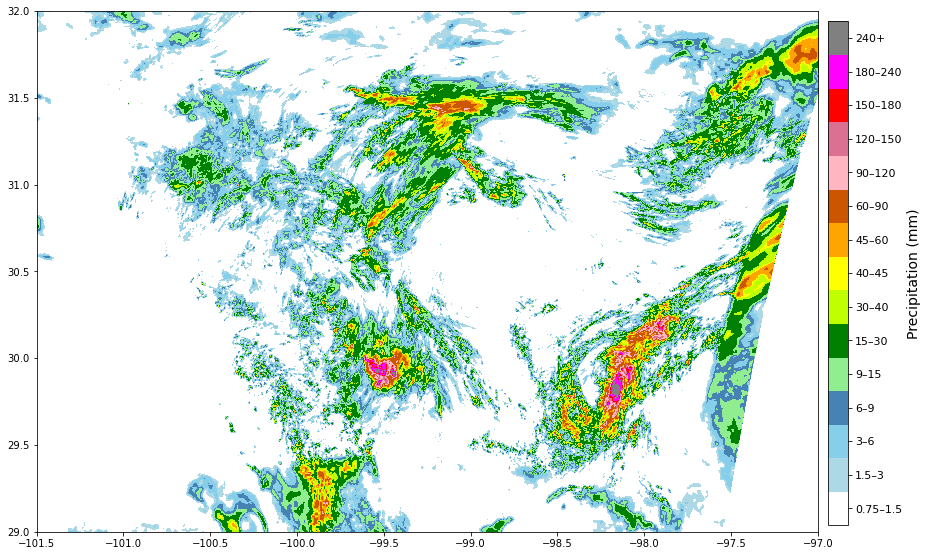

In [76]:

minx, maxx = -101.5, -97
miny, maxy = 29.0, 32


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

# Define bounds and colors
bounds = [0.75, 1.5, 3, 6, 9, 15, 30, 40, 45, 60, 90, 120, 150, 180, 240, 9999]
colors = [
    'white', '#add8e6', '#87ceeb', '#4682b4', '#90ee90', '#008000',
    '#bfff00', 'yellow', 'orange', '#cc5500', '#ffb6c1', '#db7093',
    'red', 'magenta', 'gray'
]
labels = [
    '0.75–1.5', '1.5–3', '3–6', '6–9', '9–15', '15–30', '30–40',
    '40–45', '45–60', '60–90', '90–120', '120–150', '150–180',
    '180–240', '240+'
]

# Set up colormap and norm
cmap = ListedColormap(colors)
norm = BoundaryNorm(bounds, len(colors))

# ---- Plot the actual data ----
fig, ax = plt.subplots(figsize=(14, 10))

im = ax.imshow(
    summedP['paramId_0'].squeeze(),
    zorder=0,
    cmap=cmap,
    norm=norm,
    extent=[minx, maxx, miny, maxy],
    origin='upper'
)

# ---- Add a fake image for colorbar to control spacing ----
dummy_data = np.arange(len(colors)).reshape(1, -1)  # 1 row, 15 columns
dummy_norm = BoundaryNorm(np.arange(len(colors) + 1), len(colors))

# Add dummy axes
cax = fig.add_axes([0.91, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cb = fig.colorbar(
    plt.cm.ScalarMappable(cmap=ListedColormap(colors), norm=dummy_norm),
    cax=cax,
    ticks=np.arange(len(labels)) + 0.5,  # Center ticks
    spacing='uniform'
)

cb.ax.set_yticklabels(labels)
cb.set_label("Precipitation (mm)", fontsize=14)
cb.ax.tick_params(labelsize=11)


ValueError: The number of FixedLocator locations (14), usually from a call to set_ticks, does not match the number of ticklabels (15).

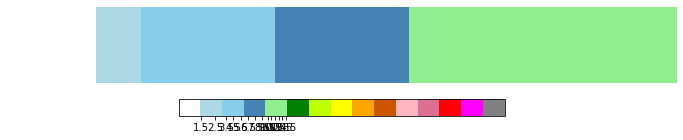

In [74]:

from matplotlib.colors import ListedColormap, BoundaryNorm

# Uneven bin edges
bounds = [0.75, 1.5, 3, 6, 9, 15, 30, 40, 45, 60, 90, 120, 150, 180, 240, 9999]

# 15 color segments
colors = [
    'white', '#add8e6', '#87ceeb', '#4682b4', '#90ee90', '#008000',
    '#bfff00', 'yellow', 'orange', '#cc5500', '#ffb6c1', '#db7093',
    'red', 'magenta', 'gray'
]

# Create colormap and norm
cmap = ListedColormap(colors)
norm = BoundaryNorm(bounds, ncolors=len(colors), clip=True)

import numpy as np
import matplotlib.pyplot as plt

# Create dummy mappable image: one row with 15 values (1 per bin)
dummy_data = np.arange(len(colors)).reshape(1, -1)

fig, ax = plt.subplots(figsize=(12, 2))  # Adjust height/width for vertical/horizontal
im = ax.imshow(dummy_data, cmap=cmap, norm=norm, aspect='auto')
ax.axis('off')  # no axes for dummy

# Midpoints for tick placement
tick_labels = [
    '0.75–1.5', '1.5–3', '3–6', '6–9', '9–15', '15–30', '30–40',
    '40–45', '45–60', '60–90', '90–120', '120–150', '150–180',
    '180–240', '240+'
]
tick_positions = np.linspace(0.5, len(colors) - 0.5, len(colors))

# Add colorbar with uniform spacing
cbar = fig.colorbar(im, orientation='horizontal', ticks=tick_positions, spacing='uniform')
cbar.ax.set_xticklabels(tick_labels, rotation=45, ha='right')
cbar.set_label("Precipitation (mm)", fontsize=14)

In [75]:
# Create mappable from real data
im = ax.imshow(real_data, cmap=cmap, norm=norm, ...)

# Then use the same dummy image just for the colorbar
dummy = ax.imshow(dummy_data, cmap=cmap, norm=norm, visible=False)
cbar = fig.colorbar(dummy, ax=ax, orientation='horizontal', ticks=tick_positions, spacing='uniform')
cbar.ax.set_xticklabels(tick_labels, rotation=45, ha='right')

SyntaxError: positional argument follows keyword argument (<ipython-input-75-d937c227ac79>, line 2)